The Boston Housing Dataset is a toy dataset, consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes. 

Aim: Is to predict the price of houses, given various factors that influence the price

The Boston data frame has 506 rows and 14 columns.

In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Our equation for linear regression :-

L(W,B)= 1/n Σ (y-w.x-b)^2

take partial derivative w.r.t W dL/dW and B dL/dB

dL/dW = 1/n Σ (-2x)(y-w.x-b)

dL/dB= 1/n Σ (-2)(y-w.x-b)

W(j+1)=W(j) – r *(dL/dW)

B(j+1)=B(j) – r*(dL/dB)

iterate this till W(k) becomes nearly equal to W(k+1) and B(k) nearly equal to B(k+1).

After that find out predicted output on test data and calculate mean squared error.

<h2><font color='red'>[1.1] Loading the Boston Dataset</font></h2>

In [24]:
boston = load_boston()
X = load_boston().data
Y = load_boston().target
print(type(X))



<class 'numpy.ndarray'>


In [25]:
names = boston["feature_names"]
print(names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<h2><font color='red'>[1.2] Splitting data into Train and Test</font></h2>

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


 Vectorizing Numerical features

In [27]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<h2><font color='red'>[1.3] Applying SGD Regressor on Train and Test</font></h2>

In [28]:
clf = SGDRegressor(loss='squared_loss')
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_train, clf.predict(X_train)))

19.17364516552629


In [29]:
import matplotlib.pyplot as plt
Y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, clf.predict(X_train))
test_mse = mean_squared_error(Y_test, Y_pred)
print('Train Mean Square error: ', train_mse)
print('Test Mean Square error: ', test_mse)

Train Mean Square error:  19.17364516552629
Test Mean Square error:  29.98576704785638


In [31]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Regressor", "Train MSE", "Test MSE"]
table.add_row(['SGDRegressor', round(train_mse,2), round(test_mse,2)])

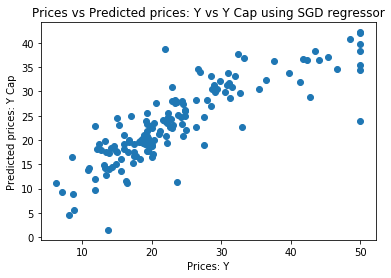

In [32]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: Y")
plt.ylabel("Predicted prices: Y Cap")
plt.title("Prices vs Predicted prices: Y vs Y Cap using SGD regressor")
plt.show()

<h2><font color='red'>[1.4] Applying Maunal SGD Regressor on Train and Test</font></h2>

In [33]:
iteration=1000
alpha=0.01

#Randomly choose 100 samples
k=100

#we are initializing the Weight vector with 0 vector having same number of items like x_train and intercept B to 0
W=np.zeros(shape=(1,13))
B=0

while iteration>=0: 
    idx = np.random.choice(np.arange(len(X_train)), k, replace=False)
    x = X_train[idx]
    y = Y_train[idx]
    
    w,b,=W,B
    temp_loss =np.zeros(shape=(1,13))
    temp_intercept =0
    
    for i in range(k):
        #partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        #dL/dW = 1/n Σ (-2x)(y-w.x-b)
        temp_loss+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))
        
        #partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        #dL/dB= 1/n Σ (-2)(y-w.x-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))
        
        
    #W(j+1)=1/n(W(j) – r *(dL/dW))
    W=(w-alpha*(temp_loss)/k)
    
    #B(j+1)=1/n(B(j) – r*(dL/dB))
    B=(b-alpha*(temp_intercept)/k)

    iteration-=1
    
print(W)
print(B)

[[-1.07106903  1.14362035 -0.31561463  1.10695188 -1.64935064  2.19125727
  -0.08882166 -3.20021609  2.18199561 -1.71355043 -1.74399624  0.81607338
  -3.74238575]]
[22.13513631]


In [34]:
#Alternative way 
'''
iteration=1000
lr_rate=0.01
k=100

#we are initializing the Weight vector with 0 vector having same number of items like x_train and intercept B to 0
W=np.zeros(shape=(1,13))
B=0

training_data=pd.DataFrame(X_train)
training_data['price']=Y_train
training_data.head()

while iteration>=0: 
    data=training_data.sample(k) #sampling random k=batch size=100 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    w,b,=W,B
    temp_loss =np.zeros(shape=(1,13))
    temp_intercept =0
    
    for i in range(k):
        #partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_loss+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))
        
        #partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))
        
    W=(w-lr_rate*(temp_loss)/k)
    B=(b-lr_rate*(temp_intercept)/k)

    iteration-=1
    
print(W)
print(B)

'''

"\niteration=1000\nlr_rate=0.01\nk=100\n\n#we are initializing the Weight vector with 0 vector having same number of items like x_train and intercept B to 0\nW=np.zeros(shape=(1,13))\nB=0\n\ntraining_data=pd.DataFrame(X_train)\ntraining_data['price']=Y_train\ntraining_data.head()\n\nwhile iteration>=0: \n    data=training_data.sample(k) #sampling random k=batch size=100 data\n    x=np.array(data.drop('price',axis=1))\n    y=np.array(data['price'])\n    \n    w,b,=W,B\n    temp_loss =np.zeros(shape=(1,13))\n    temp_intercept =0\n    \n    for i in range(k):\n        #partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)\n        temp_loss+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))\n        \n        #partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)\n        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))\n        \n    W=(w-lr_rate*(temp_loss)/k)\n    B=(b-lr_rate*(temp_intercept)/k)\n\n    iteration-=1\n    \nprint(W)\nprint(B)\n\n"

In [35]:
#prediction on x_test using manual SGD
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_train_manual=[]
for i in range(len(X_train)):
    val=np.dot(W,X_train[i])+B  #val= wTx+b
    y_train_manual.append(np.asscalar(val))
    
    
y_test_manual=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_test_manual.append(np.asscalar(val))

In [36]:
manual_train_mse = mean_squared_error(Y_train, y_train_manual)
manual_test_mse = mean_squared_error(Y_test, y_test_manual)
print('Manual Train Mean Square error: ', manual_train_mse)
print('Manual Test Mean Square error: ', manual_test_mse)

table.add_row(['Manual SGDRegressor', round(manual_train_mse,2), round(manual_test_mse,2)])

Manual Train Mean Square error:  19.188779894643204
Manual Test Mean Square error:  29.963011590043447


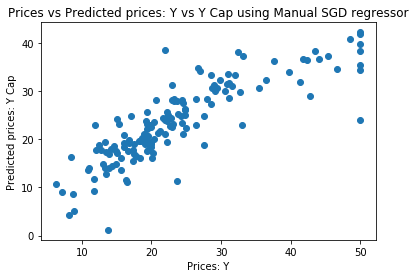

In [37]:
plt.scatter(Y_test, y_test_manual)
plt.xlabel("Prices: Y")
plt.ylabel("Predicted prices: Y Cap")
plt.title("Prices vs Predicted prices: Y vs Y Cap using Manual SGD regressor")
plt.show()

<h2><font color='red'>[1.3] Applying Linear Regression on Train and Test</font></h2>

In [38]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_train, clf.predict(X_train)))

import matplotlib.pyplot as plt
Y_pred = clf.predict(X_test)

train_mse = mean_squared_error(Y_train, clf.predict(X_train))
test_mse = mean_squared_error(Y_test, Y_pred)
print('Train Mean Square error: ', train_mse)
print('Test Mean Square error: ', test_mse)
table.add_row(['Linear Regression', round(train_mse,2), round(test_mse,2)])


19.07368870346903
Train Mean Square error:  19.07368870346903
Test Mean Square error:  30.05399330712423


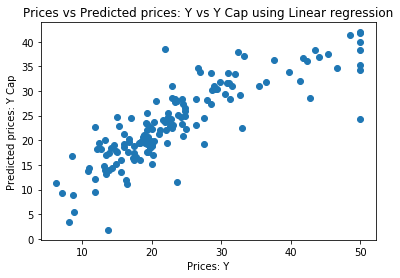

In [39]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: Y")
plt.ylabel("Predicted prices: Y Cap")
plt.title("Prices vs Predicted prices: Y vs Y Cap using Linear regression")
plt.show()

In [40]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
print(table)

+---------------------+-----------+----------+
|      Regressor      | Train MSE | Test MSE |
+---------------------+-----------+----------+
|     SGDRegressor    |   19.17   |  29.99   |
| Manual SGDRegressor |   19.19   |  29.96   |
|  Linear Regression  |   19.07   |  30.05   |
+---------------------+-----------+----------+


<h2> Summary </h2>

The scatter plots and mean squared error of both Manual SGDRegressor and  SKleran SGDRegressor are nearly equal.